# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import tensorflow as tf
from tensorflow.contrib.layers import flatten

%matplotlib inline


---
## Step 0: Load The Data

In [2]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

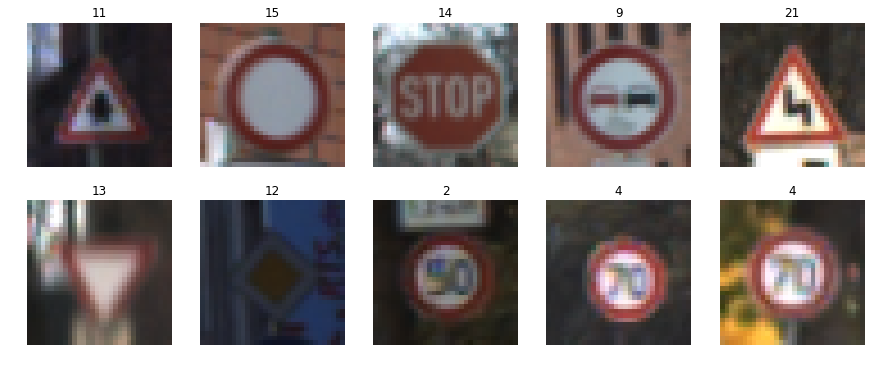

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.

# show image of 10 random data points
fig, axes = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2)
axes = axes.ravel()
random.seed(100)
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axes[i].axis('off')
    axes[i].imshow(image)
    axes[i].set_title(y_train[index])

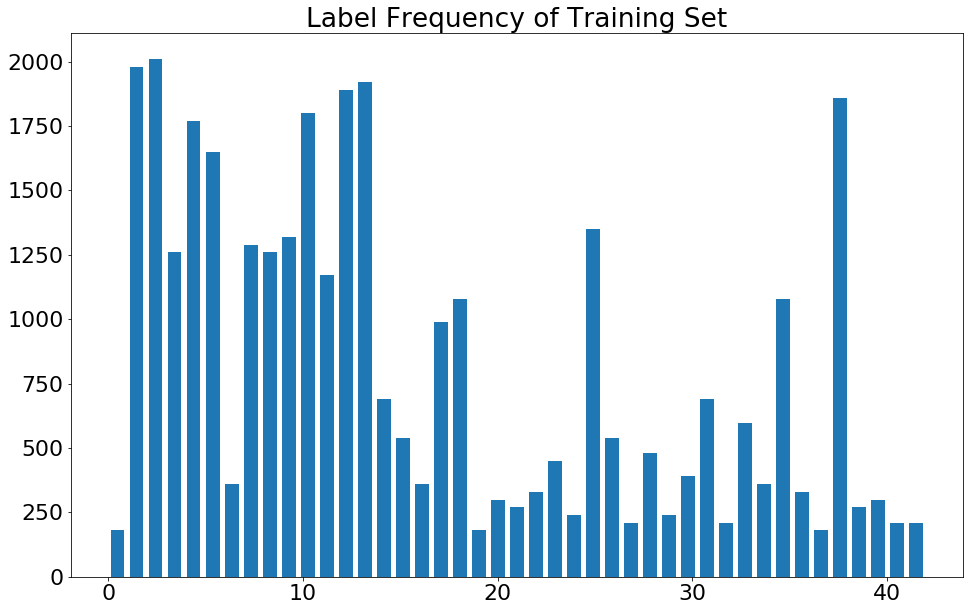

In [5]:
# histogram of label frequency in training set
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 22})
plt.bar(center, hist, align='center', width=width)
plt.title("Label Frequency of Training Set")
plt.show()

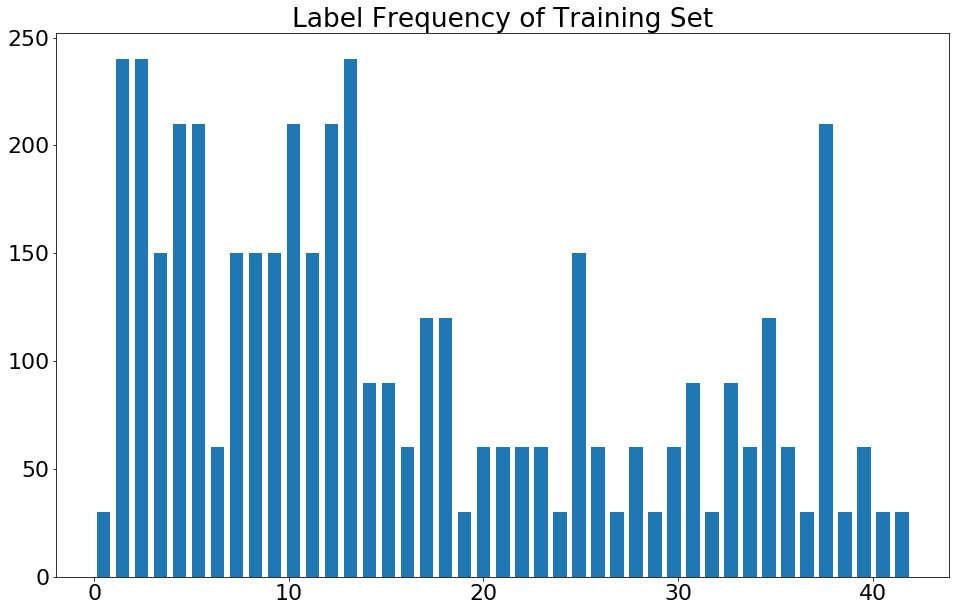

In [6]:
# histogram of label frequency in validation set
hist, bins = np.histogram(y_valid, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 22})
plt.bar(center, hist, align='center', width=width)
plt.title("Label Frequency of Training Set")
plt.show()

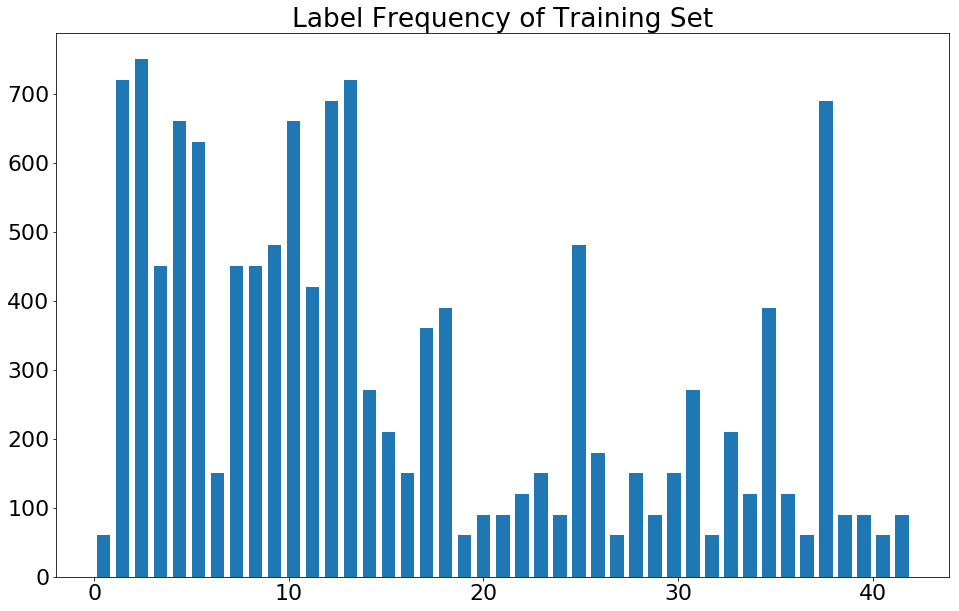

In [7]:
# histogram of label frequency in test set
hist, bins = np.histogram(y_test, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 22})
plt.bar(center, hist, align='center', width=width)
plt.title("Label Frequency of Training Set")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Convert to grayscale
X_train_rgb = X_train
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

print('RGB image shape:', X_train_rgb.shape)
print('Grayscale image shape:', X_train_gray.shape)

RGB image shape: (34799, 32, 32, 3)
Grayscale image shape: (34799, 32, 32, 1)


In [9]:
X_train = X_train_gray
X_test = X_test_gray


In [10]:
## Normalize the train and test datasets to (-1,1)

X_train_normalized = (X_train - 128)/128 
X_test_normalized = (X_test - 128)/128

print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))

-0.354081335648
-0.358215153428


### Discussion

The submission describes the preprocessing techniques used and why these techniques were chosen.

### Answer:

The preprocessing process consists of:

- Converting to grayscale: It helps to reduce training time, which was nice when a GPU wasn't available.

- Normalizing the data to the range (-1,1) - This was done using the line of code X_train_normalized = (X_train - 128)/128. This is because having a wider distribution in the data would make it more difficult to train using a singlar learning rate. Different features could encompass far different ranges and a single learning rate might make some weights diverge.


### create the validation dataset

The SciKit Learn train_test_split function is used to create a validation set out of the training set. 20% of the training set to create the validation set.

In [11]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## Shuffle the training dataset

X_train_normalized, y_train = shuffle(X_train_normalized, y_train)

## Split validation dataset off from training dataset

X_train, X_validation, y_train, y_validation = train_test_split(X_train_normalized, y_train, test_size=0.20, random_state=100)

print("Previous X_train sample size:",len(X_train_normalized))
print("New X_train sample size:",len(X_train))
print("X_validation sample size:",len(X_validation))

Previous X_train sample size: 34799
New X_train sample size: 27839
X_validation sample size: 6960


### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Details of Model Architecture

- 5x5 convolution (32x32x1 in, 28x28x6 out)
- ReLU
- 2x2 max pool (28x28x6 in, 14x14x6 out)
- 5x5 convolution (14x14x6 in, 10x10x16 out)
- ReLU
- 2x2 max pool (10x10x16 in, 5x5x16 out)
- Flatten layer (5x5x16 -> 400)
- Fully connected layer (400 in, 120 out)
- ReLU
- Dropout layer
- Fully connected layer (120 in, 84 out)
- ReLU
- Dropout layer
- Fully connected layer (84 in, 43 out)

In [13]:
epochs = 100
batch_size = 64
learning_rate = 0.001

In [14]:
tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units in Dropout layer
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Discussion
How the model was trained by discussing what optimizer was used, batch size, number of epochs and values for hyperparameters.


### Answer:

The Adam optimizer is used. The hyperparameters are used as follows:

- batch size: 64
- epochs: 100
- learning rate: 0.001
- mu: 0
- sigma: 0.1
- dropout keep probability: 0.7


In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Start Training Process ....")
    maximum_validation_acc = 0
    for i in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.7})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("Epoch {}: Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
        if validation_accuracy>maximum_validation_acc:
            maximum_validation_acc = validation_accuracy
            saver.save(sess, './lenet')
            print("Model saved")
            

Start Training Process ....
Epoch 1: Validation Accuracy = 0.853
Model saved
Epoch 2: Validation Accuracy = 0.923
Model saved
Epoch 3: Validation Accuracy = 0.955
Model saved
Epoch 4: Validation Accuracy = 0.964
Model saved
Epoch 5: Validation Accuracy = 0.970
Model saved
Epoch 6: Validation Accuracy = 0.964
Epoch 7: Validation Accuracy = 0.976
Model saved
Epoch 8: Validation Accuracy = 0.978
Model saved
Epoch 9: Validation Accuracy = 0.977
Epoch 10: Validation Accuracy = 0.976
Epoch 11: Validation Accuracy = 0.978
Model saved
Epoch 12: Validation Accuracy = 0.980
Model saved
Epoch 13: Validation Accuracy = 0.979
Epoch 14: Validation Accuracy = 0.979
Epoch 15: Validation Accuracy = 0.982
Model saved
Epoch 16: Validation Accuracy = 0.981
Epoch 17: Validation Accuracy = 0.989
Model saved
Epoch 18: Validation Accuracy = 0.975
Epoch 19: Validation Accuracy = 0.980
Epoch 20: Validation Accuracy = 0.983
Epoch 21: Validation Accuracy = 0.988
Epoch 22: Validation Accuracy = 0.990
Model saved
E

In [18]:
# Now (drumroll) evaluate the accuracy of the model on the test dataset

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 0.936


### Discussion

Describes the approach to finding a solution. Accuracy on the validation set is 0.93 or greater.

### Answer

The test accuray is 93.6% for the trained model. 

In order to find the solution, I have done a lot of work to adjust the hyper parameters in order to find a good performance for the trained model, for example, the learning rate and batch size, etc. Of course, I also searched on the internet and read the literature to find the potential options from the existing work, which has reduced a lot of my time to do the trial and error processes. 

Meanwhile, in order to reduce the overfitting, I save the trained model when only the validation accuracy has been improved.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

figure paths: ['new-found-traffic-signs/1.png', 'new-found-traffic-signs/10.png', 'new-found-traffic-signs/9.png', 'new-found-traffic-signs/23.png', 'new-found-traffic-signs/30.png', 'new-found-traffic-signs/3.png', 'new-found-traffic-signs/28.png', 'new-found-traffic-signs/36.png']
labels: [1, 10, 9, 23, 30, 3, 28, 36]


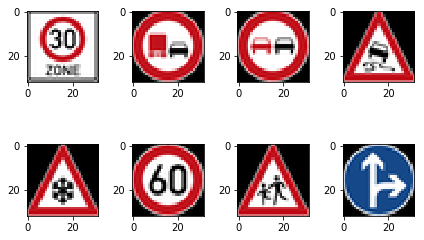

(8, 32, 32, 1)


In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image

import os
from PIL import Image

image_files  = ['new-found-traffic-signs/' + image_file for image_file in os.listdir('new-found-traffic-signs') if image_file.endswith('.png')]
labels = [int(image_file[:-4]) for image_file in os.listdir('new-found-traffic-signs') if image_file.endswith('.png')]
print("figure paths: {}".format(image_files))
print("labels: {}".format(labels))


plt.rcParams.update({'font.size': 10})
images = []
for image_file in image_files:
    image = Image.open(image_file)
    image = image.convert('RGB')
    image = image.resize((32, 32), Image.ANTIALIAS)
    image = np.array(list(image.getdata()), dtype='uint8')
    image = np.reshape(image, (32, 32, 3))

    images.append(image)
images = np.array(images, dtype='uint8')


for i, image in enumerate(images):
    plt.subplot(2, 4, i+1)
    plt.imshow(image)

plt.tight_layout()
plt.show()

images = np.asarray(images)
images_gry = np.sum(images/3, axis=3, keepdims=True)
images_normalized = (images_gry - 128)/128 

print(images_normalized.shape)

### Discussion

Discussion is made as to particular qualities of the images or traffic signs in the images that are of interest, such as whether they would be difficult for the model to classify.

### Answer:

The images used for testing are obtained from https://routetogermany.com/drivingingermany/road-signs. These traffic signs are not different from photos which are taken from real world scenarios. There are no background information in these images. In this case, it should be easier for classification. However, our model is trained based on the real world images with other background information and the traffic signs in training set are not filled into entire image. There are difference in the testing images and training images.

Some images in our testing images may be difficult to be classified, for example, the "'new-found-traffic-signs/1.png'", although it is a speed limit sign, it has a characters "zone" in this image, this is different from most of the samples in our training data set.

### Predict the Sign Type for Each Image

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(images_normalized, labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 0.750


### Discussion

The performance on the new images is compared to the accuracy results of the test set.

#### Answer:

The model appears to have predicted the new signs with 75% accuracy, which is less than the 94.6% test accuracy. This is reasonable due to the small testing dataset and also some difference existing between the testing images and trainging images.

### Analyze Performance

INFO:tensorflow:Restoring parameters from ./lenet


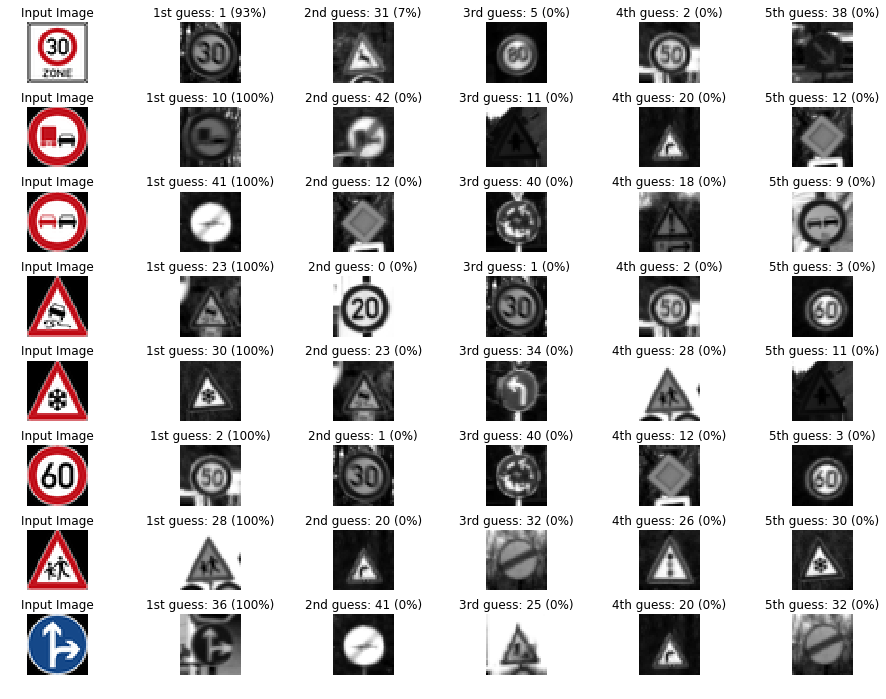

In [21]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: images_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: images_normalized, keep_prob: 1.0})

    plt.rcParams.update({'font.size': 10})
    fig, axs = plt.subplots(len(images),6, figsize=(16, 12))
    fig.subplots_adjust(hspace = .4)
    axs = axs.ravel()

    for i, image in enumerate(images):
        axs[6*i].axis('off')
        axs[6*i].imshow(image)
        axs[6*i].set_title('Input Image')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_validation == guess1)[0]
        axs[6*i+1].axis('off')
        axs[6*i+1].imshow(X_validation[index1].squeeze(), cmap='gray')
        axs[6*i+1].set_title('1st guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_validation == guess2)[0]
        axs[6*i+2].axis('off')
        axs[6*i+2].imshow(X_validation[index2].squeeze(), cmap='gray')
        axs[6*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_validation == guess3)[0]
        axs[6*i+3].axis('off')
        axs[6*i+3].imshow(X_validation[index3].squeeze(), cmap='gray')
        axs[6*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))
        guess4 = my_top_k[1][i][3]
        index4 = np.argwhere(y_validation == guess4)[0]
        axs[6*i+4].axis('off')
        axs[6*i+4].imshow(X_validation[index4].squeeze(), cmap='gray')
        axs[6*i+4].set_title('4th guess: {} ({:.0f}%)'.format(guess4, 100*my_top_k[0][i][3]))
        guess5 = my_top_k[1][i][4]
        index5 = np.argwhere(y_validation == guess5)[0]
        axs[6*i+5].axis('off')
        axs[6*i+5].imshow(X_validation[index5].squeeze(), cmap='gray')
        axs[6*i+5].set_title('5th guess: {} ({:.0f}%)'.format(guess5, 100*my_top_k[0][i][4]))

### Discussion

Discusses how certain or uncertain the model is of its predictions

### Answer

The model is somehow 100% certain of 5 out of 6 of the signs I gave it. For the first image, it has 93% certain of its prediction. For the third and sixth images, although the model has 100% certain of its prediction, the model has misclassified these two images. This indicates the shortage of given deep learning model on the uncertainty qunatification.